In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform

In [3]:
dat=fetch_openml(data_id=42972)


C:\Users\Admin\PycharmProjects\pythonProject1\pythonProject\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
df = pd.DataFrame(dat.data,columns=dat.feature_names)
for i in df.columns:
    print(i)

df=df.dropna()    



id
age
bp
sg
al
su
rbc
pc
pcc
ba
bgr
bu
sc
sod
pot
hemo
pcv
wc
rc
htn
dm
cad
appet
pe
ane
classification


In [164]:

df2=df.loc[:,['age','bp','bgr',
'bu',
'sc',
'sod',
'pot',
'hemo',
'pcv',
'wc',
'rc']]

df=df.drop(columns=['bp','bgr',
'bu',
'sc',
'sod',
'pot',
'hemo',
'pcv',
'wc',
'rc','id','age'])

In [219]:
df=df.drop(df[df['classification']=='ckd\t'].index)
df['ane']=df['ane'].replace({'no':0,'yes':1})
df['pe']=df['pe'].replace({'no':0,'yes':1})
df['appet']=df['appet'].replace({'good':1,'poor':0})
df['cad']=df['cad'].replace({'no':0,'yes':1})
df['dm']=df['dm'].replace({'no':0,'yes':1})
df['htn']=df['htn'].replace({'no':0,'yes':1})
df['rbc']=df['rbc'].replace({'normal':1,'abnormal':0})
df['pc']=df['pc'].replace({'normal':1,'abnormal':0})
df['pcc']=df['pcc'].replace({'notpresent':0,'present':1})
df['ba']=df['ba'].replace({'notpresent':0,'present':1})
df['classification']=df['classification'].replace({'ckd':1,'notckd':0})

df2['wc']-100

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [217]:
y_=np.array([df['classification']]).reshape(-1,1)
x_=np.array(df.drop(columns=['classification']))
x_2=quantile_transform(np.array(df2),n_quantiles=158)
x_=np.hstack((x_,x_2))
x_[111]

array([347.0, 43.0, 60.0, 1.025, 0.0, 0.0, 1, 1, 0, 0, 108.0, 25.0, 1.0,
       144.0, 5.0, 17.8, '43', '7200', '5.5', 0, 0, 0, 1, 0, 0,
       0.3184713375796179, 0.1305732484076433, 0.42038216560509556,
       0.2229299363057325, 0.4554140127388535, 0.748407643312102,
       0.8471337579617835, 1.0, 0.445859872611465, 0.410828025477707,
       0.713375796178344], dtype=object)

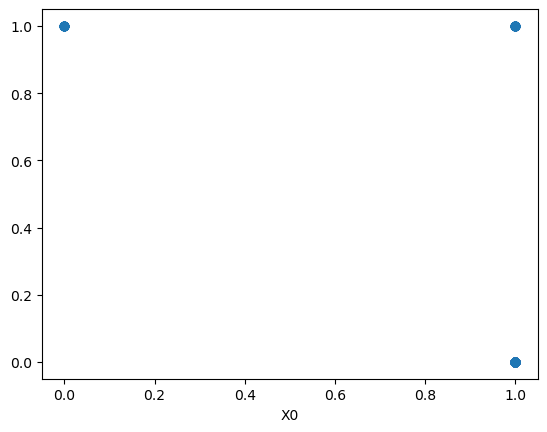

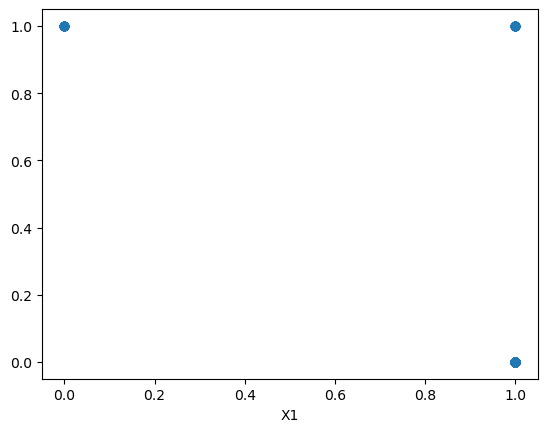

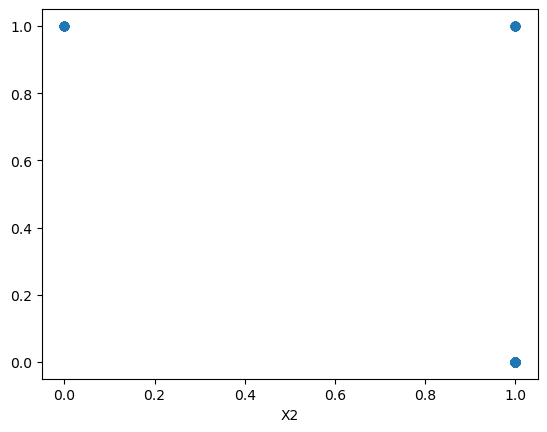

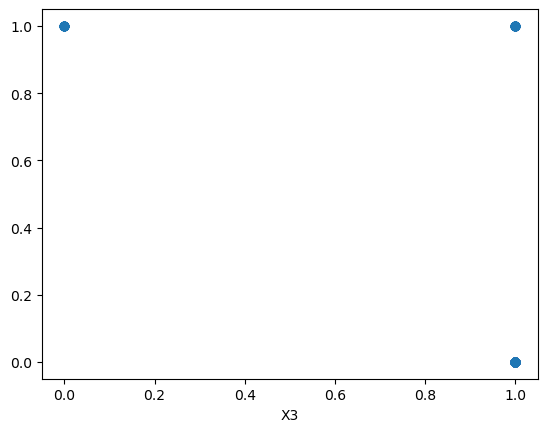

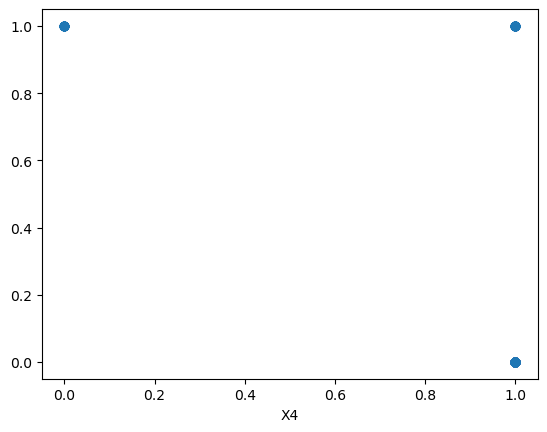

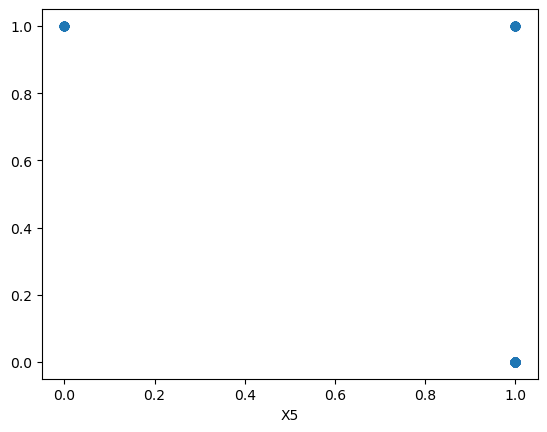

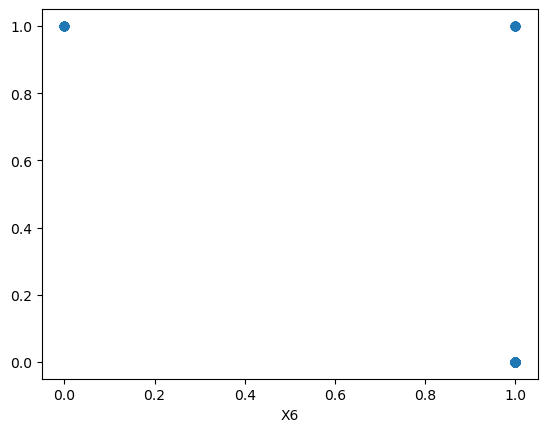

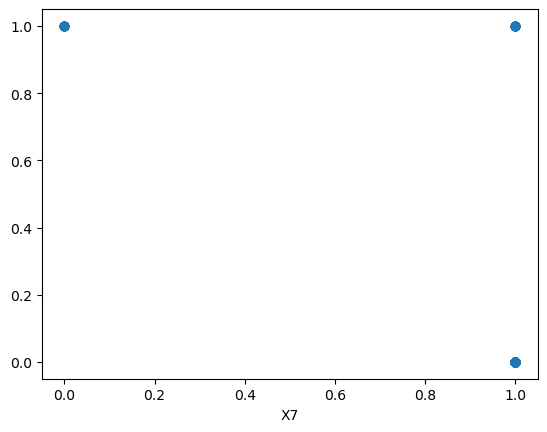

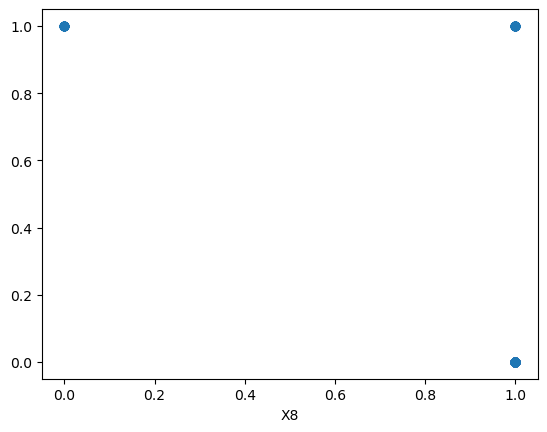

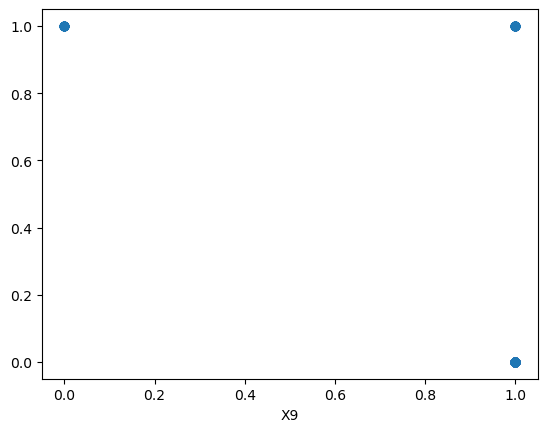

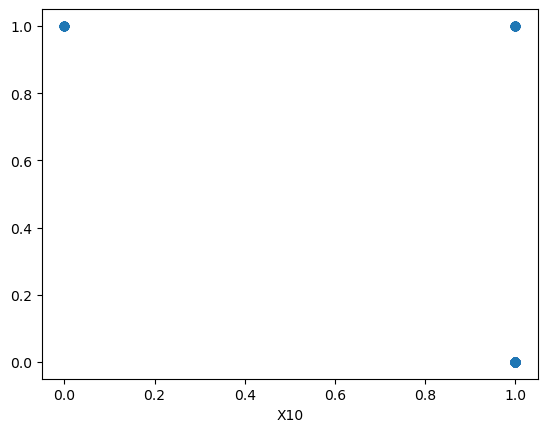

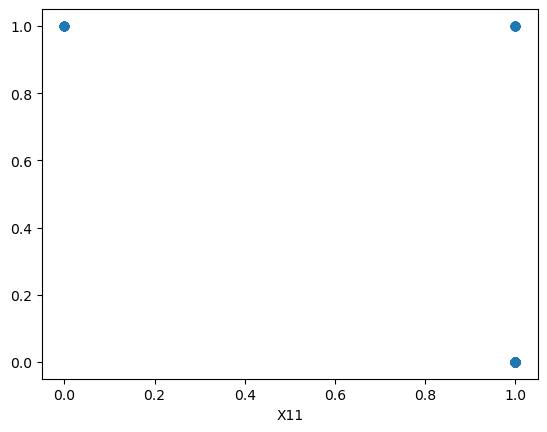

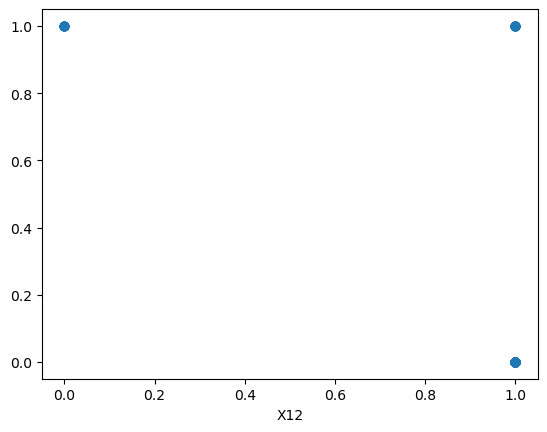

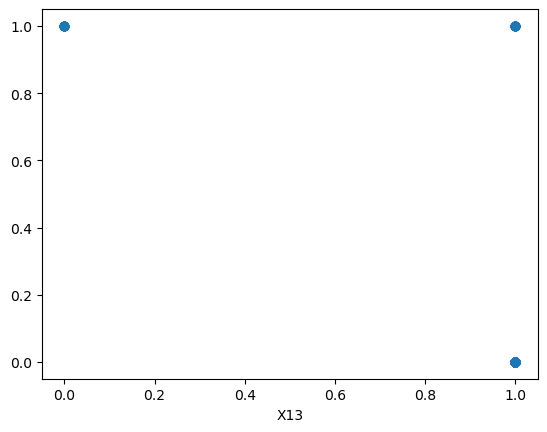

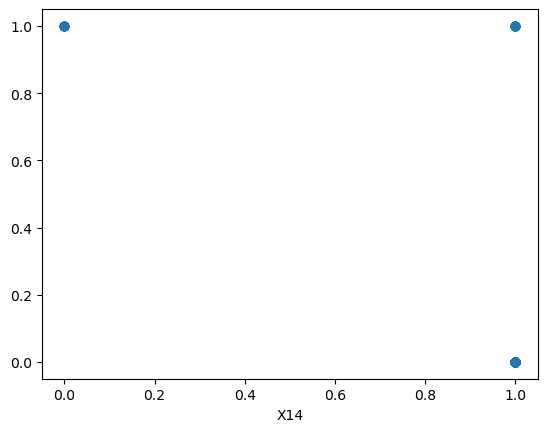

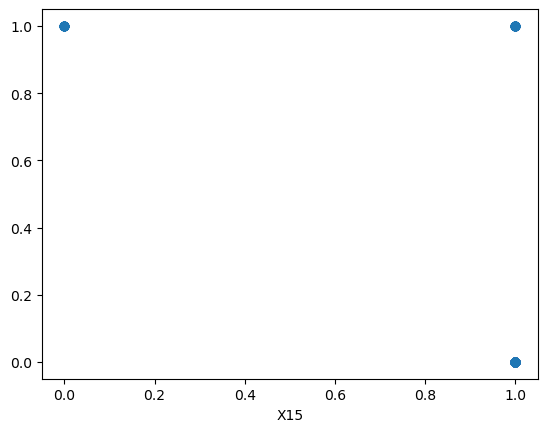

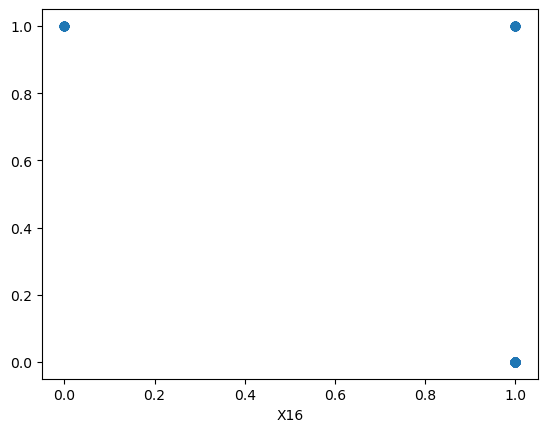

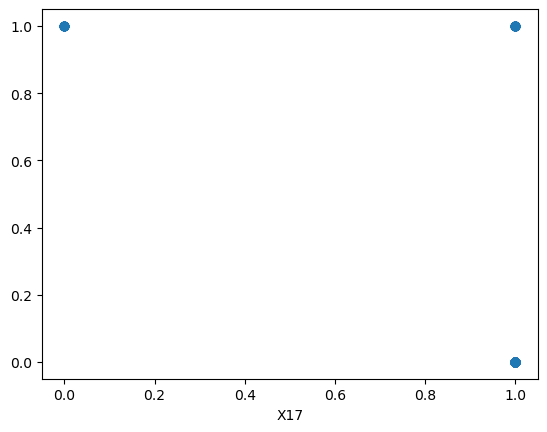

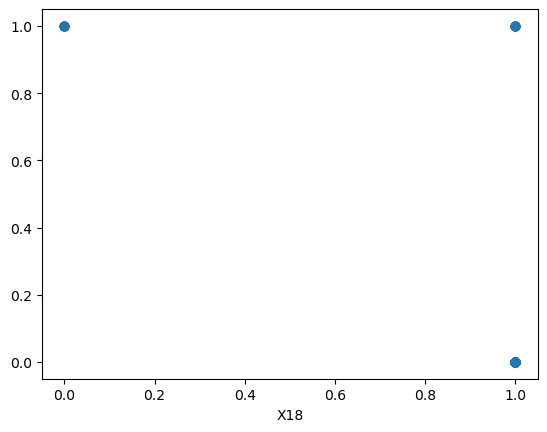

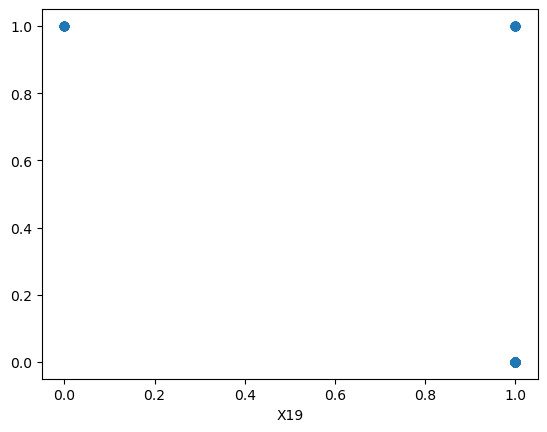

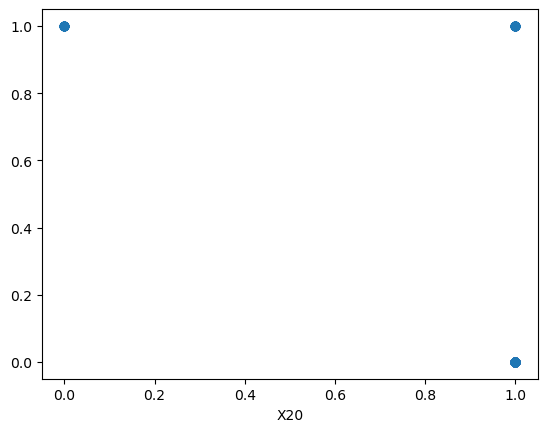

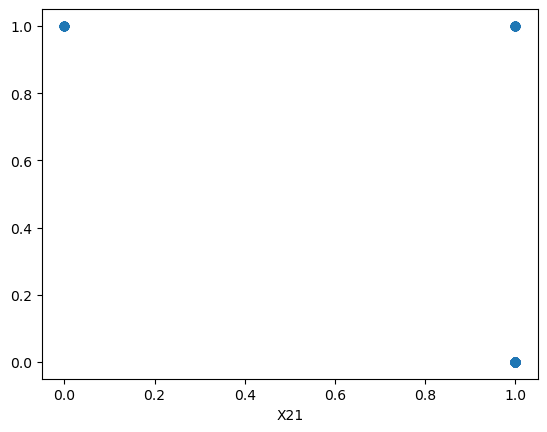

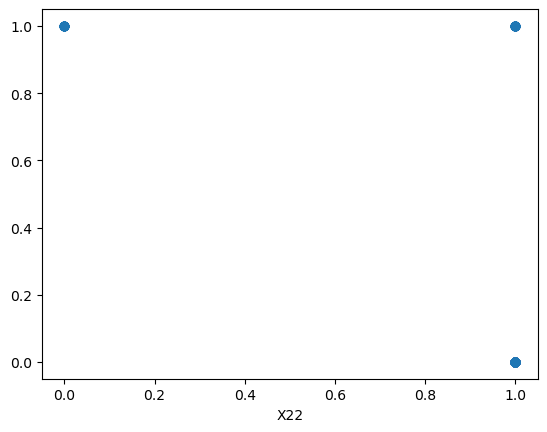

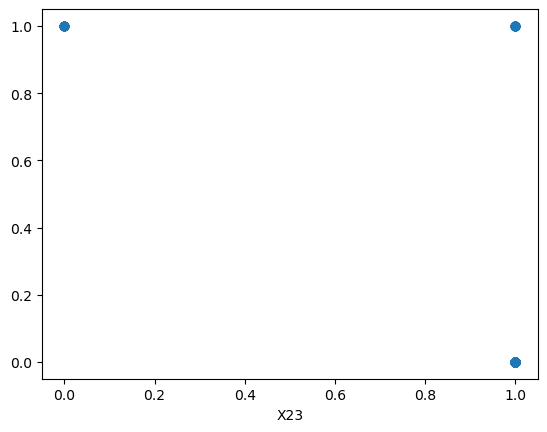

In [185]:
for i  in range(24):
    plt.scatter(x_[0:,3],y_)
    plt.xlabel(f"X{i}")
    plt.show()


In [193]:
y_train=y_[0:110,0]
x_train=x_[0:110,:]

x_test=x_[110:,:]
y_test=y_[110:,:]


x_test.shape

(48, 24)

In [187]:
pipe_linear=Pipeline([('scale',PolynomialFeatures()),('model',LogisticRegression(max_iter=5000))])
pipe_linear.get_params()

{'memory': None,
 'steps': [('scale', PolynomialFeatures()),
  ('model', LogisticRegression(max_iter=5000))],
 'verbose': False,
 'scale': PolynomialFeatures(),
 'model': LogisticRegression(max_iter=5000),
 'scale__degree': 2,
 'scale__include_bias': True,
 'scale__interaction_only': False,
 'scale__order': 'C',
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 5000,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [188]:
Grid=GridSearchCV(estimator=pipe_linear,param_grid={'scale__degree':[1,2,3,4,5]},cv=5)


In [189]:
model=Grid.fit(x_train,y_train)

In [208]:
predict_train=model.predict(x_train)
predict_test=model.predict(x_test)

In [213]:
count=0
for i in range(predict_train.shape[0]):
    if(predict_train[i]!=y_train[i]):
        count+=1

        
count2=0
for i in range(predict_test.shape[0]):
    if(predict_test[i]!=y_test[i]):
        count2+=1
        
print(f"Num of false prediction in training set:{count/predict_train.shape[0]}\nNum of false prediction in testing set:{count2/predict_test.shape[0]}")    

Num of false prediction in training set:0.0
Num of false prediction in testing set:0.0
